<a href="https://colab.research.google.com/github/SineNitish/CV/blob/main/ML_on_brain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
import pandas as pd
df = pd.read_csv('final_data1.csv')

# Model on Risk parameter




In [ ]:
df=df.drop(['Unnamed: 0'],axis=1)

In [ ]:
df=df.drop(['pid'],axis=1)

In [ ]:

df

,age,gender,nhiss,mrs,systolic,distolic,glucose,paralysis,smoking,bmi,cholestrol,tos,risk
0,61,Male,0,-1,124,80,77,0,0,22,200,-1,0
1,75,Male,0,-1,123,82,79,0,0,20,208,-1,0
2,73,Male,0,-1,121,83,83,0,0,20,208,-1,0
3,63,Female,0,-1,120,85,105,0,0,20,210,-1,0
4,23,Male,0,-1,126,81,89,0,0,22,201,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4793,67,Male,13,6,180,83,198,1,2,39,219,3,2
4794,67,Female,20,3,180,88,188,0,2,22,187,1,2
4795,65,Male,6,4,126,111,227,0,3,23,233,3,2
4796,64,Male,19,5,126,82,262,2,2,28,244,1,2


In [ ]:
y=[]
for i in df.tos:
    if i == -1:
        y.append(0)
    else:
        y.append(i)
df['tos']=y

y=[]
for i in df.gender:
    if i == "Male":
        y.append(1)
    else:
        y.append(0)
df['gen']=y

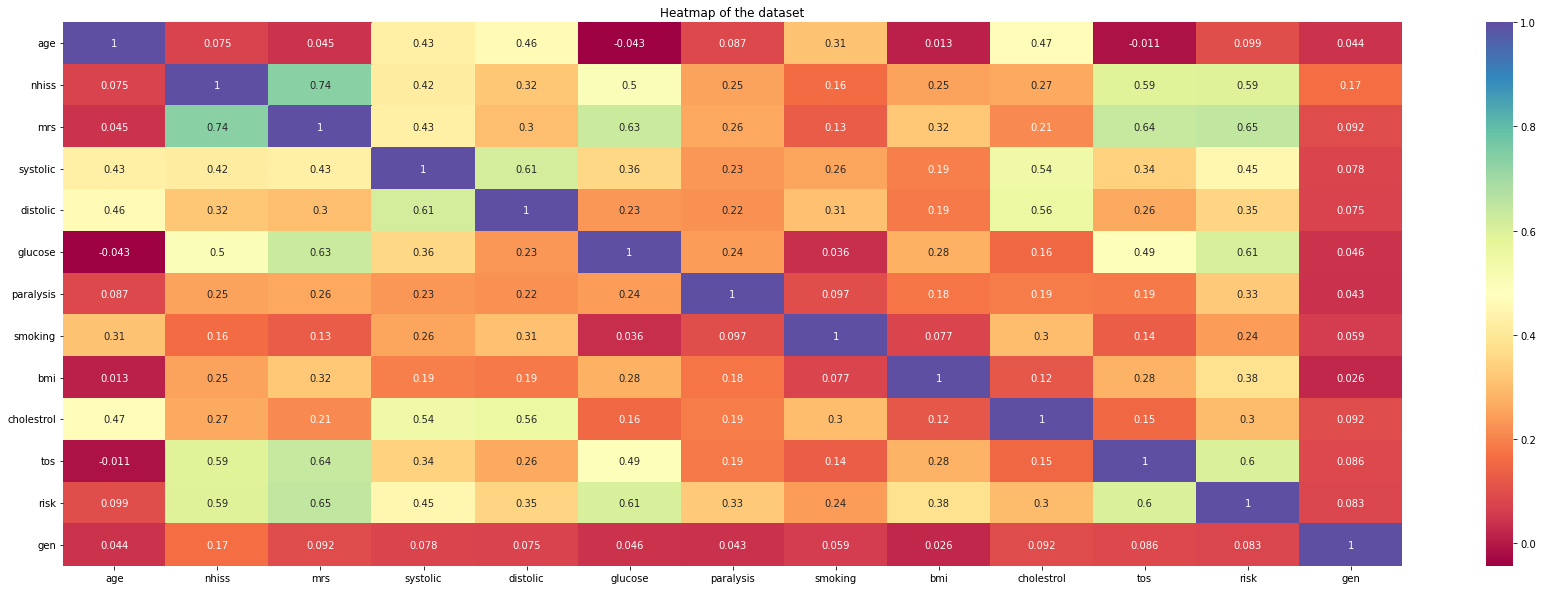

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn

# read you data into df
# put your code here


plt.figure(figsize=(30,10))
sn.heatmap(df.corr(), annot=True, cmap="Spectral")
plt.title('Heatmap of the dataset')
plt.show()

In [ ]:
df

,age,gender,nhiss,mrs,systolic,distolic,glucose,paralysis,smoking,bmi,cholestrol,tos,risk,gen
0,61,Male,0,-1,124,80,77,0,0,22,200,0,0,1
1,75,Male,0,-1,123,82,79,0,0,20,208,0,0,1
2,73,Male,0,-1,121,83,83,0,0,20,208,0,0,1
3,63,Female,0,-1,120,85,105,0,0,20,210,0,0,0
4,23,Male,0,-1,126,81,89,0,0,22,201,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4793,67,Male,13,6,180,83,198,1,2,39,219,3,2,1
4794,67,Female,20,3,180,88,188,0,2,22,187,1,2,0
4795,65,Male,6,4,126,111,227,0,3,23,233,3,2,1
4796,64,Male,19,5,126,82,262,2,2,28,244,1,2,1


In [ ]:
t_cols=["age","gen","systolic","distolic","glucose","paralysis","smoking","bmi","cholestrol"]
X=df[t_cols]
t=["risk"]
y=df[t]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomForestObj = RandomForestClassifier(n_estimators=100)
randomForestObj.fit(X_train, Y_train)

<ipython-input-11-95d76c4b78b5>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForestObj.fit(X_train, Y_train)


RandomForestClassifier()

In [ ]:
from sklearn import metrics
Y_pred = randomForestObj.predict(X_test)
acc=metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",acc*100)
print("Precision Score : ",metrics.precision_score(Y_test, Y_pred,average=None))
print("Class : \n",metrics.classification_report(Y_test,Y_pred))
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("confusion : \n",confusion_matrix)
print("TrueNegatives :",confusion_matrix[0,0])
print("FalseNegatives :",confusion_matrix[1,0])
print("TruePositives :",confusion_matrix[1,1])
print("FalsePositives :",confusion_matrix[0,1])
total=confusion_matrix[0,0]+confusion_matrix[1,0]+confusion_matrix[1,1]+confusion_matrix[0,1]
print("senstivity: ",(confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[1,0]))*100)
print("specificity: ",(confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1]))*100)
print("recall: ",metrics.recall_score(Y_test,Y_pred,average='weighted'))
print("F1-Score",metrics.f1_score(Y_test,Y_pred,average='weighted'))
print("Error rate: ", ((confusion_matrix[0,1]+confusion_matrix[1,0]))/total)

Accuracy: 90.20833333333333
Precision Score :  [0.66666667 0.80813953 0.92682927 0.76363636]
Class : 
               precision    recall  f1-score   support

           0       0.67      0.64      0.65        25
           1       0.81      0.68      0.74       204
           2       0.93      0.97      0.95      1139
           3       0.76      0.58      0.66        72

    accuracy                           0.90      1440
   macro avg       0.79      0.72      0.75      1440
weighted avg       0.90      0.90      0.90      1440

confusion : 
 [[  16    9    0    0]
 [   8  139   57    0]
 [   0   24 1102   13]
 [   0    0   30   42]]
TrueNegatives : 16
FalseNegatives : 8
TruePositives : 139
FalsePositives : 9
senstivity:  94.5578231292517
specificity:  64.0
recall:  0.9020833333333333
F1-Score 0.8979930418129561
Error rate:  0.09883720930232558


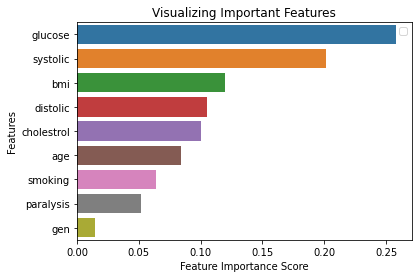

In [ ]:
import pandas as pd
feature_imp = pd.Series(randomForestObj.feature_importances_,index=t_cols).sort_values(ascending=False)
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
pred = randomForestObj.predict(X_test)
pred

array([2, 2, 2, ..., 2, 2, 2])

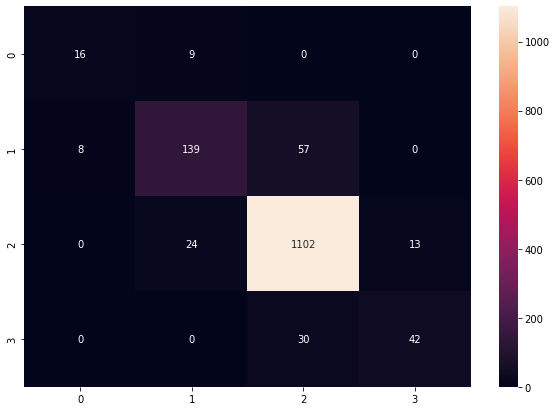

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

pred = randomForestObj.predict(X_test)

cfm=confusion_matrix(Y_test,pred)

df_cfm = pd.DataFrame(cfm)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True,fmt='.4g')
cfm_plot.figure.savefig("cfm.png")

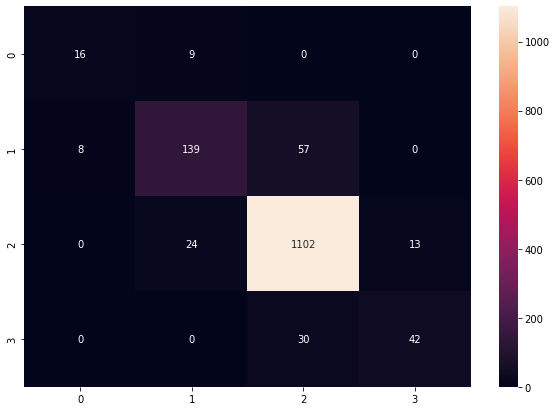

In [ ]:
df_cfm = pd.DataFrame(cfm)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True,fmt='.4g')
cfm_plot.figure.savefig("cfm.png")

##Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
Y_pred = gnb.predict(X_test)
acc=metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",acc*100)

Accuracy: 81.04166666666667


In [ ]:
from sklearn import metrics
Y_pred = gnb.predict(X_test)
acc=metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",acc*100)
print("Precision Score : ",metrics.precision_score(Y_test, Y_pred,average=None))
print("Class : \n",metrics.classification_report(Y_test,Y_pred))
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("confusion : \n",confusion_matrix)
print("TrueNegatives :",confusion_matrix[0,0])
print("FalseNegatives :",confusion_matrix[1,0])
print("TruePositives :",confusion_matrix[1,1])
print("FalsePositives :",confusion_matrix[0,1])
total=confusion_matrix[0,0]+confusion_matrix[1,0]+confusion_matrix[1,1]+confusion_matrix[0,1]
print("senstivity: ",(confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[1,0]))*100)
print("specificity: ",(confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1]))*100)
print("recall: ",metrics.recall_score(Y_test,Y_pred,average='weighted'))
print("F1-Score",metrics.f1_score(Y_test,Y_pred,average='weighted'))
print("Error rate: ", ((confusion_matrix[0,1]+confusion_matrix[1,0]))/total)

Accuracy: 81.04166666666667
Precision Score :  [0.58139535 0.52845528 0.92919496 0.45      ]
Class : 
               precision    recall  f1-score   support

           0       0.58      1.00      0.74        25
           1       0.53      0.64      0.58       204
           2       0.93      0.84      0.88      1139
           3       0.45      0.75      0.56        72

    accuracy                           0.81      1440
   macro avg       0.62      0.81      0.69      1440
weighted avg       0.84      0.81      0.82      1440

confusion : 
 [[ 25   0   0   0]
 [ 18 130  56   0]
 [  0 115 958  66]
 [  0   1  17  54]]
TrueNegatives : 25
FalseNegatives : 18
TruePositives : 130
FalsePositives : 0
senstivity:  87.83783783783784
specificity:  100.0
recall:  0.8104166666666667
F1-Score 0.8211307515837877
Error rate:  0.10404624277456648


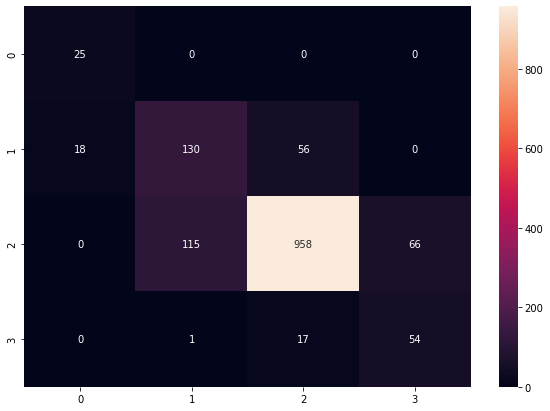

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

pred = gnb.predict(X_test)

cfm=confusion_matrix(Y_test,pred)

df_cfm = pd.DataFrame(cfm)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True,fmt='.4g')
cfm_plot.figure.savefig("cfm.png")

##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [ ]:
Y_pred = knn.predict(X_test)
acc=metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",acc*100)

Accuracy: 86.94444444444444


In [ ]:
from sklearn import metrics
Y_pred = knn.predict(X_test)
acc=metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",acc*100)
print("Precision Score : ",metrics.precision_score(Y_test, Y_pred,average=None))
print("Class : \n",metrics.classification_report(Y_test,Y_pred))
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("confusion : \n",confusion_matrix)
print("TrueNegatives :",confusion_matrix[0,0])
print("FalseNegatives :",confusion_matrix[1,0])
print("TruePositives :",confusion_matrix[1,1])
print("FalsePositives :",confusion_matrix[0,1])
total=confusion_matrix[0,0]+confusion_matrix[1,0]+confusion_matrix[1,1]+confusion_matrix[0,1]
print("senstivity: ",(confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[1,0]))*100)
print("specificity: ",(confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1]))*100)
print("recall: ",metrics.recall_score(Y_test,Y_pred,average='weighted'))
print("F1-Score",metrics.f1_score(Y_test,Y_pred,average='weighted'))
print("Error rate: ", ((confusion_matrix[0,1]+confusion_matrix[1,0]))/total)

Accuracy: 86.94444444444444
Precision Score :  [0.56666667 0.71676301 0.90756303 0.65957447]
Class : 
               precision    recall  f1-score   support

           0       0.57      0.68      0.62        25
           1       0.72      0.61      0.66       204
           2       0.91      0.95      0.93      1139
           3       0.66      0.43      0.52        72

    accuracy                           0.87      1440
   macro avg       0.71      0.67      0.68      1440
weighted avg       0.86      0.87      0.86      1440

confusion : 
 [[  17    8    0    0]
 [  11  124   69    0]
 [   2   41 1080   16]
 [   0    0   41   31]]
TrueNegatives : 17
FalseNegatives : 11
TruePositives : 124
FalsePositives : 8
senstivity:  91.85185185185185
specificity:  68.0
recall:  0.8694444444444445
F1-Score 0.8635512513418155
Error rate:  0.11875


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[  17,    8,    0,    0],
       [  11,  124,   69,    0],
       [   2,   41, 1080,   16],
       [   0,    0,   41,   31]])

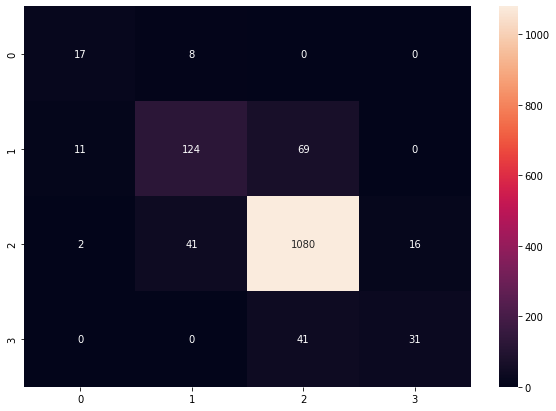

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

pred = knn.predict(X_test)

cfm=confusion_matrix(Y_test,pred)

df_cfm = pd.DataFrame(cfm)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True,fmt='.4g')
cfm_plot.figure.savefig("cfm.png")

##Linear Regression

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

In [ ]:
print('Coefficients: ', reg.coef_)

Coefficients:  [[-0.00110766  0.02647427  0.00300083  0.00095927  0.00385437  0.05531595
   0.07895678  0.01437925  0.0011746 ]]


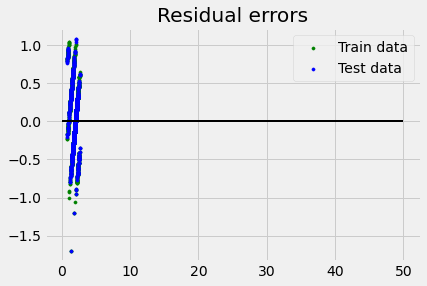

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.scatter(reg.predict(X_train), reg.predict(X_train) - Y_train,
            color = "green", s = 10, label = 'Train data')
  
plt.scatter(reg.predict(X_test), reg.predict(X_test) - Y_test,
            color = "blue", s = 10, label = 'Test data')
  

plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
  

plt.legend(loc = 'upper right')
  
plt.title("Residual errors")
  
plt.show()

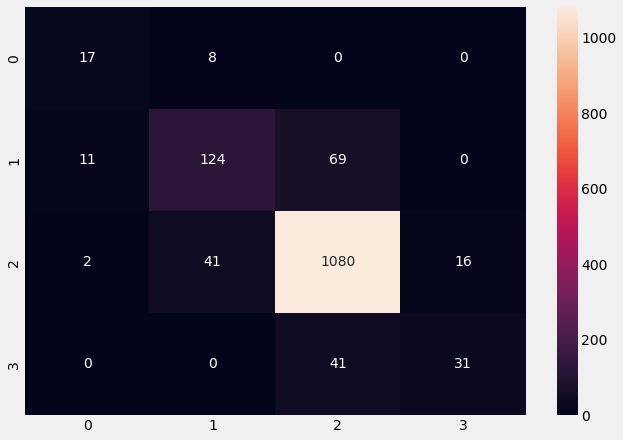

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

pred = reg.predict(X_test)

cfm=confusion_matrix(Y_test,Y_pred)

df_cfm = pd.DataFrame(cfm)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True,fmt='.4g')
cfm_plot.figure.savefig("cfm.png")

##SVM

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
Y_pred = clf.predict(X_test)
acc=metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",acc*100)

Accuracy: 84.09722222222223


In [ ]:
from sklearn import metrics
Y_pred = clf.predict(X_test)
acc=metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",acc*100)
print("Precision Score : ",metrics.precision_score(Y_test, Y_pred,average=None))
print("Class : \n",metrics.classification_report(Y_test,Y_pred))
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("confusion : \n",confusion_matrix)
print("TrueNegatives :",confusion_matrix[0,0])
print("FalseNegatives :",confusion_matrix[1,0])
print("TruePositives :",confusion_matrix[1,1])
print("FalsePositives :",confusion_matrix[0,1])
total=confusion_matrix[0,0]+confusion_matrix[1,0]+confusion_matrix[1,1]+confusion_matrix[0,1]
print("senstivity: ",(confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[1,0]))*100)
print("specificity: ",(confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1]))*100)
print("recall: ",metrics.recall_score(Y_test,Y_pred,average='weighted'))
print("F1-Score",metrics.f1_score(Y_test,Y_pred,average='weighted'))
print("Error rate: ", ((confusion_matrix[0,1]+confusion_matrix[1,0]))/total)

Accuracy: 84.09722222222223
Precision Score :  [0.         0.64779874 0.86494926 0.        ]
Class : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.65      0.50      0.57       204
           2       0.86      0.97      0.92      1139
           3       0.00      0.00      0.00        72

    accuracy                           0.84      1440
   macro avg       0.38      0.37      0.37      1440
weighted avg       0.78      0.84      0.80      1440

confusion : 
 [[   0   25    0    0]
 [   0  103  101    0]
 [   0   31 1108    0]
 [   0    0   72    0]]
TrueNegatives : 0
FalseNegatives : 0
TruePositives : 103
FalsePositives : 25
senstivity:  100.0
specificity:  0.0
recall:  0.8409722222222222
F1-Score 0.804690082644628
Error rate:  0.1953125


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: 

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[   0,   25,    0,    0],
       [   0,  103,  101,    0],
       [   0,   31, 1108,    0],
       [   0,    0,   72,    0]])

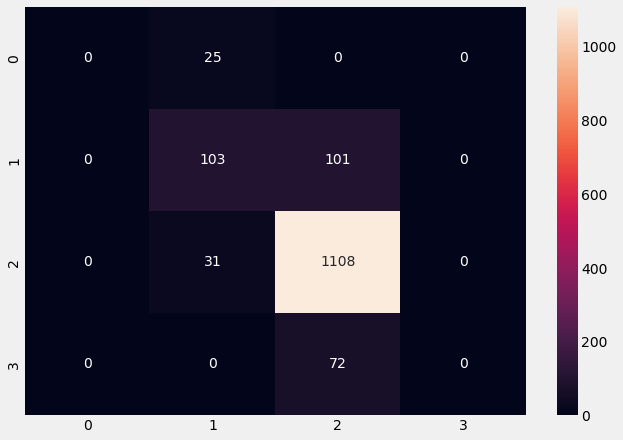

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#pred = acc.predict(X_test)

#cfm=confusion_matrix(Y_test,pred)

df_cfm = pd.DataFrame(cfm)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True,fmt='.4g')
cfm_plot.figure.savefig("cfm.png")

##Decision Tree

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
Y_pred = clf.predict(X_test)
acc=metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",acc*100)

Accuracy: 88.40277777777777


In [ ]:
from sklearn import metrics
Y_pred = clf.predict(X_test)
acc=metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",acc*100)
print("Precision Score : ",metrics.precision_score(Y_test, Y_pred,average=None))
print("Class : \n",metrics.classification_report(Y_test,Y_pred))
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("confusion : \n",confusion_matrix)
print("TrueNegatives :",confusion_matrix[0,0])
print("FalseNegatives :",confusion_matrix[1,0])
print("TruePositives :",confusion_matrix[1,1])
print("FalsePositives :",confusion_matrix[0,1])
total=confusion_matrix[0,0]+confusion_matrix[1,0]+confusion_matrix[1,1]+confusion_matrix[0,1]
print("senstivity: ",(confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[1,0]))*100)
print("specificity: ",(confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1]))*100)
print("recall: ",metrics.recall_score(Y_test,Y_pred,average='weighted'))
print("F1-Score",metrics.f1_score(Y_test,Y_pred,average='weighted'))
print("Error rate: ", ((confusion_matrix[0,1]+confusion_matrix[1,0]))/total)

Accuracy: 88.40277777777777
Precision Score :  [0.6        0.72131148 0.92327366 0.72881356]
Class : 
               precision    recall  f1-score   support

           0       0.60      0.60      0.60        25
           1       0.72      0.65      0.68       204
           2       0.92      0.95      0.94      1139
           3       0.73      0.60      0.66        72

    accuracy                           0.88      1440
   macro avg       0.74      0.70      0.72      1440
weighted avg       0.88      0.88      0.88      1440

confusion : 
 [[  15   10    0    0]
 [  10  132   61    1]
 [   0   41 1083   15]
 [   0    0   29   43]]
TrueNegatives : 15
FalseNegatives : 10
TruePositives : 132
FalsePositives : 10
senstivity:  92.95774647887323
specificity:  60.0
recall:  0.8840277777777777
F1-Score 0.8809052053346932
Error rate:  0.11976047904191617


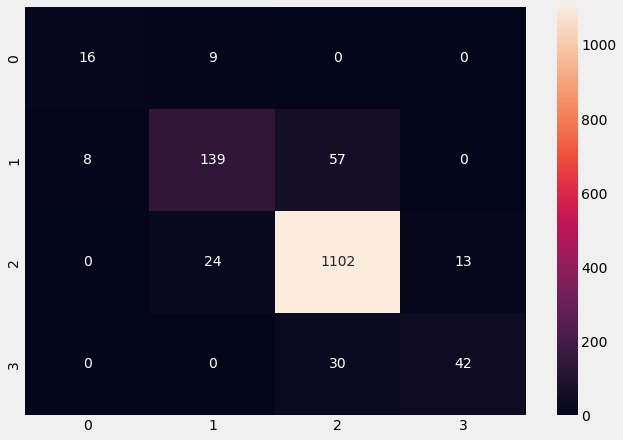

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

pred = randomForestObj.predict(X_test)

cfm=confusion_matrix(Y_test,pred)

df_cfm = pd.DataFrame(cfm)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True,fmt='.4g')
cfm_plot.figure.savefig("cfm.png")

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, Y_train)



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [ ]:
Y_pred = clf.predict(X_test)
acc=metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",acc*100)

Accuracy: 82.63888888888889


In [ ]:
from sklearn import metrics
Y_pred = clf.predict(X_test)
acc=metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",acc*100)
print("Precision Score : ",metrics.precision_score(Y_test, Y_pred,average=None))
print("Class : \n",metrics.classification_report(Y_test,Y_pred))
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("confusion : \n",confusion_matrix)
print("TrueNegatives :",confusion_matrix[0,0])
print("FalseNegatives :",confusion_matrix[1,0])
print("TruePositives :",confusion_matrix[1,1])
print("FalsePositives :",confusion_matrix[0,1])
total=confusion_matrix[0,0]+confusion_matrix[1,0]+confusion_matrix[1,1]+confusion_matrix[0,1]
print("senstivity: ",(confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[1,0]))*100)
print("specificity: ",(confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1]))*100)
print("recall: ",metrics.recall_score(Y_test,Y_pred,average='weighted'))
print("F1-Score",metrics.f1_score(Y_test,Y_pred,average='weighted'))
print("Error rate: ", ((confusion_matrix[0,1]+confusion_matrix[1,0]))/total)

Accuracy: 82.63888888888889
Precision Score :  [0.55       0.6015625  0.85294118 0.        ]
Class : 
               precision    recall  f1-score   support

           0       0.55      0.44      0.49        25
           1       0.60      0.38      0.46       204
           2       0.85      0.97      0.91      1139
           3       0.00      0.00      0.00        72

    accuracy                           0.83      1440
   macro avg       0.50      0.45      0.46      1440
weighted avg       0.77      0.83      0.79      1440

confusion : 
 [[  11   12    2    0]
 [   9   77  118    0]
 [   0   37 1102    0]
 [   0    2   70    0]]
TrueNegatives : 11
FalseNegatives : 9
TruePositives : 77
FalsePositives : 12
senstivity:  89.53488372093024
specificity:  47.82608695652174
recall:  0.8263888888888888
F1-Score 0.7913139478400523
Error rate:  0.1926605504587156


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: 

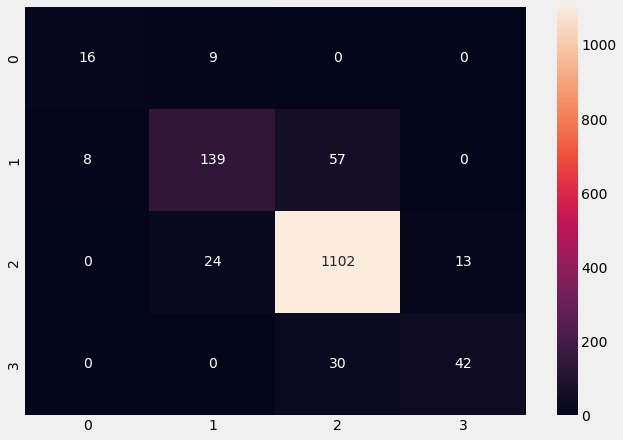

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

pred = randomForestObj.predict(X_test)

cfm=confusion_matrix(Y_test,pred)

df_cfm = pd.DataFrame(cfm)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True,fmt='.4g')
cfm_plot.figure.savefig("cfm.png")

##K Means

In [ ]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=2, random_state=0)
clf.fit(X_train, Y_train)

KMeans(n_clusters=2, random_state=0)

In [ ]:
Y_pred = clf.predict(X_test)
acc=metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",acc*100)

Accuracy: 10.625


## MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=10000, alpha=1,solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
clf.fit(X_train, Y_train)

Iteration 1, loss = 7.16963690


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 2, loss = 1.70519469
Iteration 3, loss = 1.15743479
Iteration 4, loss = 1.13519311
Iteration 5, loss = 1.11808571
Iteration 6, loss = 1.10777716
Iteration 7, loss = 1.10009700
Iteration 8, loss = 1.09452647
Iteration 9, loss = 1.08812400
Iteration 10, loss = 1.08437316
Iteration 11, loss = 1.08075909
Iteration 12, loss = 1.07836561
Iteration 13, loss = 1.07516400
Iteration 14, loss = 1.07245117
Iteration 15, loss = 1.07012980
Iteration 16, loss = 1.07309106
Iteration 17, loss = 1.06549441
Iteration 18, loss = 1.06213143
Iteration 19, loss = 1.06020060
Iteration 20, loss = 1.05587574
Iteration 21, loss = 1.05613196
Iteration 22, loss = 1.05188558
Iteration 23, loss = 1.04950669
Iteration 24, loss = 1.05264125
Iteration 25, loss = 1.04835695
Iteration 26, loss = 1.04538110
Iteration 27, loss = 1.04467695
Iteration 28, loss = 1.04276322
Iteration 29, loss = 1.03823668
Iteration 30, loss = 1.03926115
Iteration 31, loss = 1.03573599
Iteration 32, loss = 1.03245606
Iteration 33, lo

MLPClassifier(alpha=1, hidden_layer_sizes=(100, 100, 100), max_iter=10000,
              random_state=21, solver='sgd', tol=1e-09, verbose=10)

In [ ]:
Y_pred = clf.predict(X_test)
acc=metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",acc*100)

Accuracy: 85.34722222222221


In [ ]:
from sklearn import metrics
Y_pred = clf.predict(X_test)
acc=metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",acc*100)
print("Precision Score : ",metrics.precision_score(Y_test, Y_pred,average=None))
print("Class : \n",metrics.classification_report(Y_test,Y_pred))
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("confusion : \n",confusion_matrix)
print("TrueNegatives :",confusion_matrix[0,0])
print("FalseNegatives :",confusion_matrix[1,0])
print("TruePositives :",confusion_matrix[1,1])
print("FalsePositives :",confusion_matrix[0,1])
total=confusion_matrix[0,0]+confusion_matrix[1,0]+confusion_matrix[1,1]+confusion_matrix[0,1]
print("senstivity: ",(confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[1,0]))*100)
print("specificity: ",(confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1]))*100)
print("recall: ",metrics.recall_score(Y_test,Y_pred,average='weighted'))
print("F1-Score",metrics.f1_score(Y_test,Y_pred,average='weighted'))
print("Error rate: ", ((confusion_matrix[0,1]+confusion_matrix[1,0]))/total)

Accuracy: 85.34722222222221
Precision Score :  [0.72       0.70860927 0.87871486 0.52631579]
Class : 
               precision    recall  f1-score   support

           0       0.72      0.72      0.72        25
           1       0.71      0.52      0.60       204
           2       0.88      0.96      0.92      1139
           3       0.53      0.14      0.22        72

    accuracy                           0.85      1440
   macro avg       0.71      0.59      0.62      1440
weighted avg       0.83      0.85      0.83      1440

confusion : 
 [[  18    7    0    0]
 [   7  107   90    0]
 [   0   36 1094    9]
 [   0    1   61   10]]
TrueNegatives : 18
FalseNegatives : 7
TruePositives : 107
FalsePositives : 7
senstivity:  93.85964912280701
specificity:  72.0
recall:  0.8534722222222222
F1-Score 0.8348306987929413
Error rate:  0.10071942446043165


In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(activation='tanh')
clf.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh')

In [ ]:
Y_pred = clf.predict(X_test)
acc=metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",acc*100)

Accuracy: 86.11111111111111


In [ ]:
from sklearn import metrics
Y_pred = clf.predict(X_test)
acc=metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",acc*100)
print("Precision Score : ",metrics.precision_score(Y_test, Y_pred,average=None))
print("Class : \n",metrics.classification_report(Y_test,Y_pred))
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("confusion : \n",confusion_matrix)
print("TrueNegatives :",confusion_matrix[0,0])
print("FalseNegatives :",confusion_matrix[1,0])
print("TruePositives :",confusion_matrix[1,1])
print("FalsePositives :",confusion_matrix[0,1])
total=confusion_matrix[0,0]+confusion_matrix[1,0]+confusion_matrix[1,1]+confusion_matrix[0,1]
print("senstivity: ",(confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[1,0]))*100)
print("specificity: ",(confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1]))*100)
print("recall: ",metrics.recall_score(Y_test,Y_pred,average='weighted'))
print("F1-Score",metrics.f1_score(Y_test,Y_pred,average='weighted'))
print("Error rate: ", ((confusion_matrix[0,1]+confusion_matrix[1,0]))/total)

Accuracy: 86.11111111111111
Precision Score :  [0.8        0.72340426 0.88089528 0.71428571]
Class : 
               precision    recall  f1-score   support

           0       0.80      0.64      0.71        25
           1       0.72      0.50      0.59       204
           2       0.88      0.97      0.92      1139
           3       0.71      0.28      0.40        72

    accuracy                           0.86      1440
   macro avg       0.78      0.60      0.66      1440
weighted avg       0.85      0.86      0.85      1440

confusion : 
 [[  16    9    0    0]
 [   4  102   98    0]
 [   0   29 1102    8]
 [   0    1   51   20]]
TrueNegatives : 16
FalseNegatives : 4
TruePositives : 102
FalsePositives : 9
senstivity:  96.22641509433963
specificity:  64.0
recall:  0.8611111111111112
F1-Score 0.8455291831459135
Error rate:  0.09923664122137404


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=0)
clf = abc.fit(X_train, Y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
Y_pred = clf.predict(X_test)
acc=metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",acc*100)

Accuracy: 76.94444444444444


In [ ]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(X_train, Y_train, verbose=False)

[14:27:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
predictions = my_model.predict(X_test)
acc=metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",acc*100)

Accuracy: 76.94444444444444


# **ANN**

In [ ]:
classifier = Sequential()
classifier.add(Dense(6, activation='relu', kernel_initializer='glorot_uniform',input_dim=11))

NameError: ignored

In [ ]:
classifier.add(Dense(6, activation='relu', kernel_initializer='glorot_uniform'))

In [ ]:

classifier.add(Dense( activation='relu', kernel_initializer='glorot_uniform',output_dim=11))

# TOS

In [ ]:
df

,age,gender,nhiss,mrs,systolic,distolic,glucose,paralysis,smoking,bmi,cholestrol,tos,risk,gen
0,61,Male,0,-1,124,80,77,0,0,22,200,0,0,1
1,75,Male,0,-1,123,82,79,0,0,20,208,0,0,1
2,73,Male,0,-1,121,83,83,0,0,20,208,0,0,1
3,63,Female,0,-1,120,85,105,0,0,20,210,0,0,0
4,23,Male,0,-1,126,81,89,0,0,22,201,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4793,67,Male,13,6,180,83,198,1,2,39,219,3,2,1
4794,67,Female,20,3,180,88,188,0,2,22,187,1,2,0
4795,65,Male,6,4,126,111,227,0,3,23,233,3,2,1
4796,64,Male,19,5,126,82,262,2,2,28,244,1,2,1


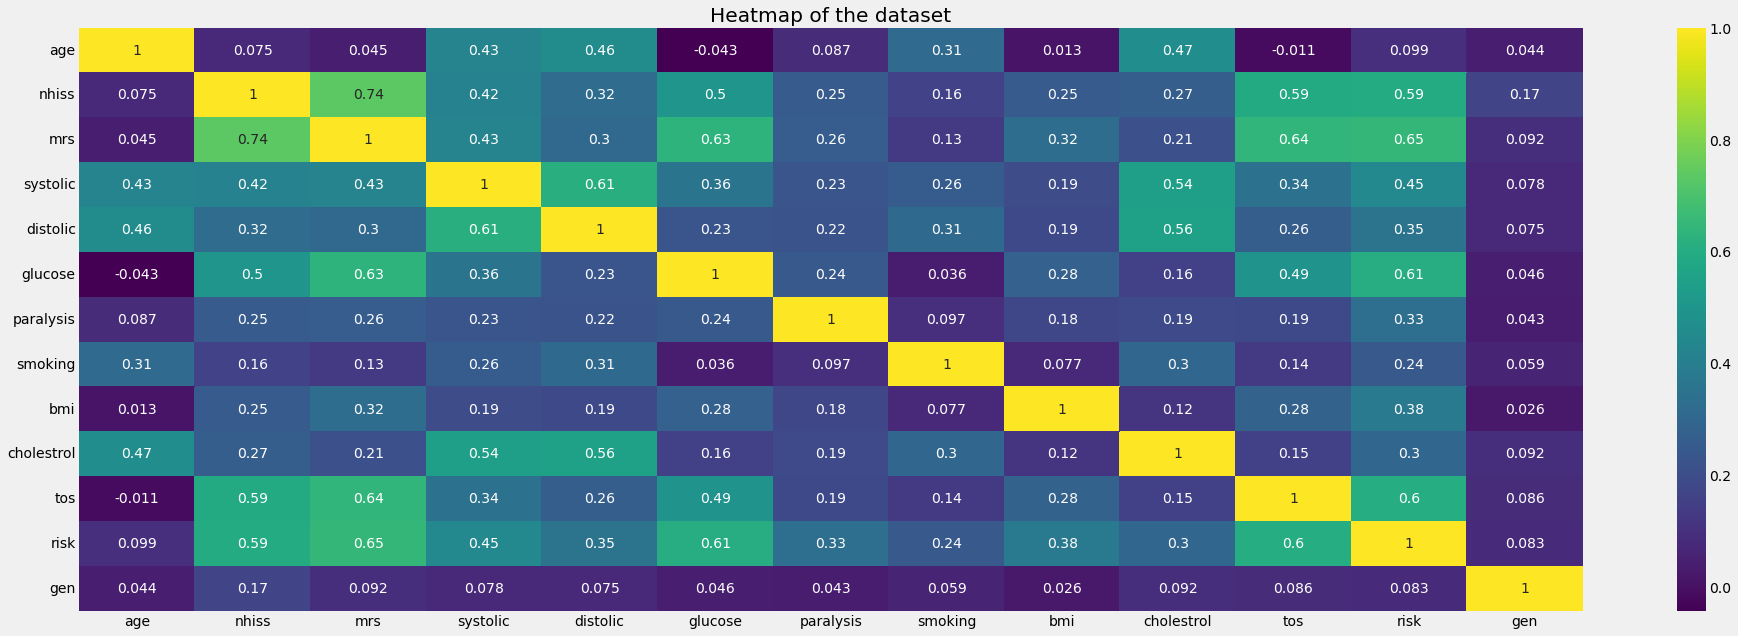

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn

# read you data into df
# put your code here


plt.figure(figsize=(30,10))
sn.heatmap(df.corr(), annot=True, cmap="viridis")
plt.title('Heatmap of the dataset')
plt.show()

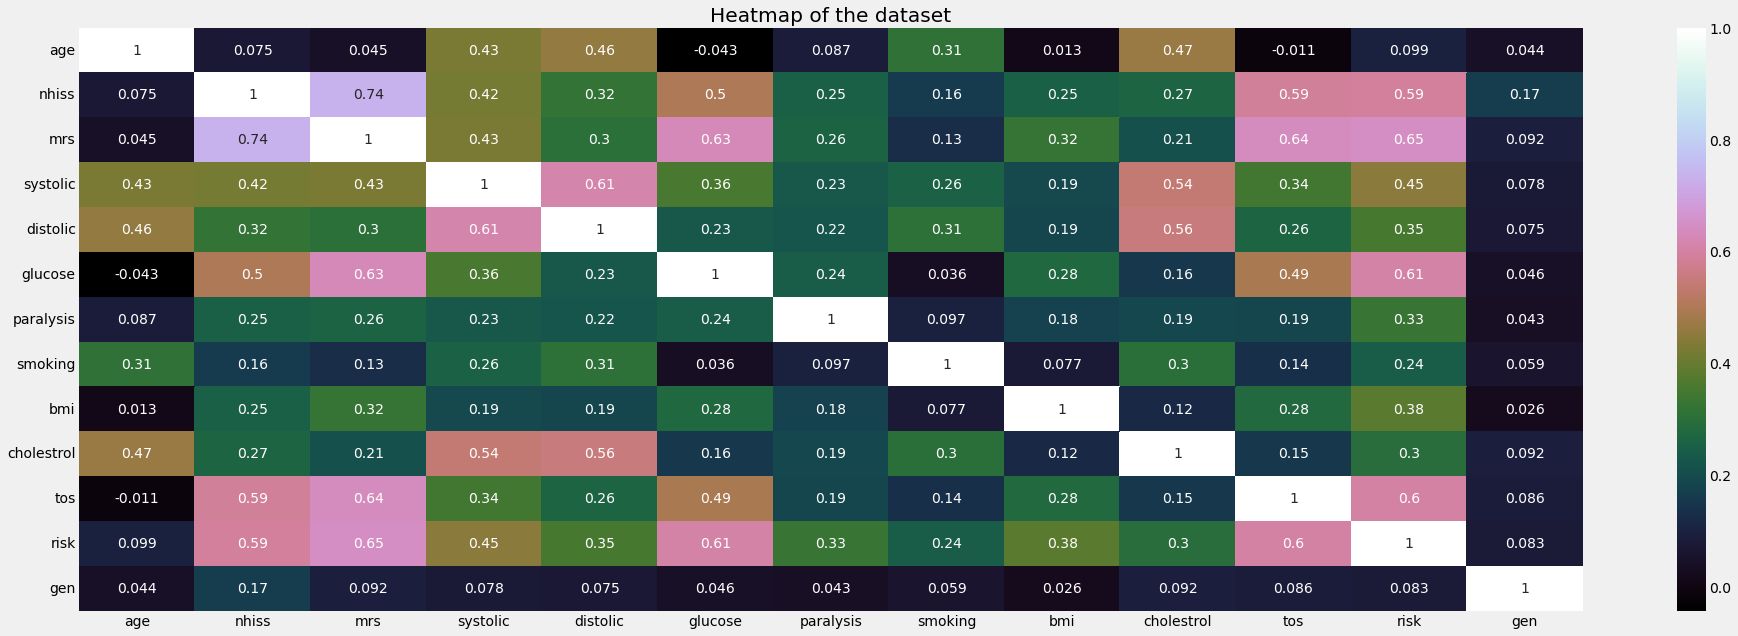

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn

# read you data into df
# put your code here


plt.figure(figsize=(30,10))
sn.heatmap(df.corr(), annot=True, cmap="cubehelix")
plt.title('Heatmap of the dataset')
plt.show()

In [ ]:
y=[]
for i in df.gender:
    if i == "Male":
        y.append(1)
    else:
        y.append(0)
df['gen']=y

In [ ]:
t_cols=["age","gen","systolic","distolic","glucose","paralysis","smoking","bmi","cholestrol"]
X=df[t_cols]
t=["tos"]
y=df[t]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomForestObj = RandomForestClassifier(n_estimators=100)
randomForestObj.fit(X_train, Y_train)

<ipython-input-64-95d76c4b78b5>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForestObj.fit(X_train, Y_train)


RandomForestClassifier()

In [ ]:
from sklearn import metrics
Y_pred = randomForestObj.predict(X_test)
acc=metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",acc*100)
print("Precision Score : ",metrics.precision_score(Y_test, Y_pred,average=None))
print("Class : \n",metrics.classification_report(Y_test,Y_pred))
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("confusion : \n",confusion_matrix)
print("TrueNegatives :",confusion_matrix[0,0])
print("FalseNegatives :",confusion_matrix[1,0])
print("TruePositives :",confusion_matrix[1,1])
print("FalsePositives :",confusion_matrix[0,1])
total=confusion_matrix[0,0]+confusion_matrix[1,0]+confusion_matrix[1,1]+confusion_matrix[0,1]
print("senstivity: ",(confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[1,0]))*100)
print("specificity: ",(confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1]))*100)
print("recall: ",metrics.recall_score(Y_test,Y_pred,average='weighted'))
print("F1-Score",metrics.f1_score(Y_test,Y_pred,average='weighted'))
print("Error rate: ", ((confusion_matrix[0,1]+confusion_matrix[1,0]))/total)

Accuracy: 57.70833333333333
Precision Score :  [1.         0.70616114 0.50877193 0.53459119]
Class : 
               precision    recall  f1-score   support

           0       1.00      0.74      0.85        43
           1       0.71      0.68      0.69       218
           2       0.51      0.58      0.54       351
           3       0.53      0.49      0.51       348

    accuracy                           0.58       960
   macro avg       0.69      0.62      0.65       960
weighted avg       0.58      0.58      0.58       960

confusion : 
 [[ 32   6   4   1]
 [  0 149  45  24]
 [  0  25 203 123]
 [  0  31 147 170]]
TrueNegatives : 32
FalseNegatives : 0
TruePositives : 149
FalsePositives : 6
senstivity:  100.0
specificity:  84.21052631578947
recall:  0.5770833333333333
F1-Score 0.5789481525231525
Error rate:  0.03208556149732621


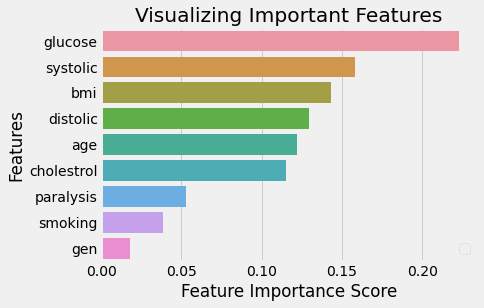

In [ ]:
import pandas as pd
feature_imp = pd.Series(randomForestObj.feature_importances_,index=t_cols).sort_values(ascending=False)
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
pred = randomForestObj.predict(X_test)
pred

array([2, 2, 2, 3, 3, 3, 1, 2, 2, 3, 2, 2, 1, 1, 1, 2, 1, 3, 3, 3, 1, 1,
       2, 2, 3, 2, 0, 2, 1, 2, 3, 0, 3, 2, 2, 2, 1, 2, 3, 1, 1, 1, 3, 3,
       1, 3, 2, 3, 2, 3, 1, 1, 2, 2, 3, 1, 1, 2, 1, 1, 0, 2, 3, 2, 1, 1,
       3, 2, 2, 2, 2, 3, 0, 3, 1, 2, 2, 3, 1, 3, 1, 3, 1, 2, 2, 2, 1, 3,
       3, 1, 3, 2, 1, 1, 2, 2, 3, 1, 1, 3, 2, 2, 3, 1, 1, 1, 1, 1, 3, 1,
       2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 2, 3, 2, 3, 3, 1, 2, 1,
       3, 2, 2, 1, 3, 2, 1, 2, 2, 2, 3, 2, 3, 1, 2, 2, 2, 3, 1, 2, 1, 1,
       2, 2, 2, 3, 3, 2, 0, 3, 1, 3, 2, 3, 2, 3, 1, 2, 3, 2, 3, 1, 2, 3,
       2, 2, 2, 3, 2, 3, 0, 1, 3, 3, 1, 1, 3, 3, 3, 2, 1, 0, 3, 1, 1, 2,
       1, 3, 3, 1, 1, 3, 3, 2, 2, 3, 2, 2, 1, 3, 0, 2, 2, 1, 1, 3, 2, 1,
       1, 3, 2, 2, 3, 0, 2, 0, 2, 3, 3, 2, 2, 2, 2, 3, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 3, 2, 1, 3, 3, 1, 1, 3, 2, 3, 2, 2, 3, 1, 3, 3, 2, 2, 2,
       2, 3, 3, 2, 1, 3, 3, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 3, 2, 3,
       3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 0, 3,

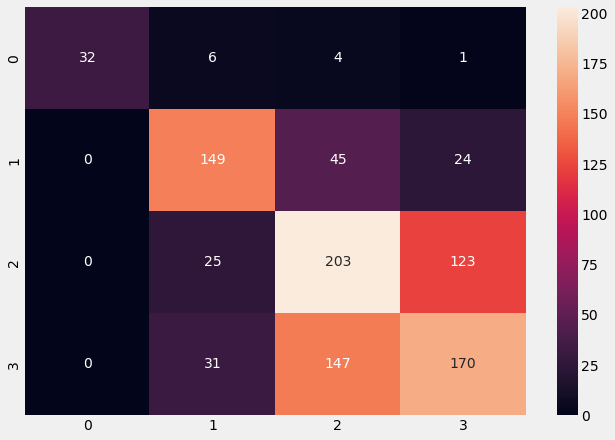

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

pred = randomForestObj.predict(X_test)

cfm=confusion_matrix(Y_test,pred)

df_cfm = pd.DataFrame(cfm)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True,fmt='.4g')
cfm_plot.figure.savefig("cfm.png")

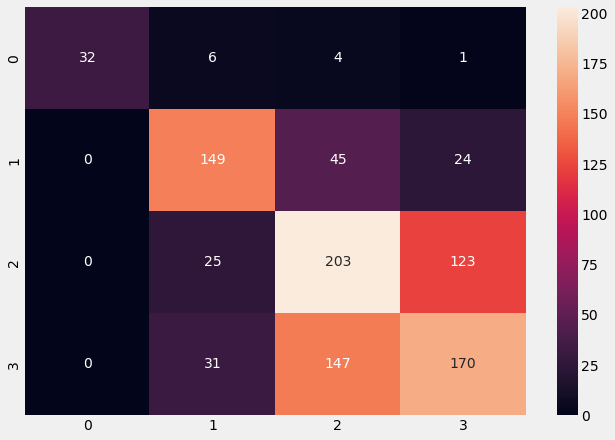

In [ ]:
df_cfm = pd.DataFrame(cfm)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True,fmt='.4g')
cfm_plot.figure.savefig("cfm.png")

Navie bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
Y_pred = gnb.predict(X_test)
acc=metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",acc*100)

Accuracy: 52.29166666666667


In [ ]:
from sklearn import metrics
Y_pred = gnb.predict(X_test)
acc=metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",acc*100)
print("Precision Score : ",metrics.precision_score(Y_test, Y_pred,average=None))
print("Class : \n",metrics.classification_report(Y_test,Y_pred))
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("confusion : \n",confusion_matrix)
print("TrueNegatives :",confusion_matrix[0,0])
print("FalseNegatives :",confusion_matrix[1,0])
print("TruePositives :",confusion_matrix[1,1])
print("FalsePositives :",confusion_matrix[0,1])
total=confusion_matrix[0,0]+confusion_matrix[1,0]+confusion_matrix[1,1]+confusion_matrix[0,1]
print("senstivity: ",(confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[1,0]))*100)
print("specificity: ",(confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1]))*100)
print("recall: ",metrics.recall_score(Y_test,Y_pred,average='weighted'))
print("F1-Score",metrics.f1_score(Y_test,Y_pred,average='weighted'))
print("Error rate: ", ((confusion_matrix[0,1]+confusion_matrix[1,0]))/total)

Accuracy: 52.29166666666667
Precision Score :  [0.66037736 0.64130435 0.48266667 0.48275862]
Class : 
               precision    recall  f1-score   support

           0       0.66      0.81      0.73        43
           1       0.64      0.54      0.59       218
           2       0.48      0.52      0.50       351
           3       0.48      0.48      0.48       348

    accuracy                           0.52       960
   macro avg       0.57      0.59      0.57       960
weighted avg       0.53      0.52      0.52       960

confusion : 
 [[ 35   4   2   2]
 [ 12 118  53  35]
 [  3  24 181 143]
 [  3  38 139 168]]
TrueNegatives : 35
FalseNegatives : 12
TruePositives : 118
FalsePositives : 4
senstivity:  90.76923076923077
specificity:  89.74358974358975
recall:  0.5229166666666667
F1-Score 0.523282078223723
Error rate:  0.09467455621301775


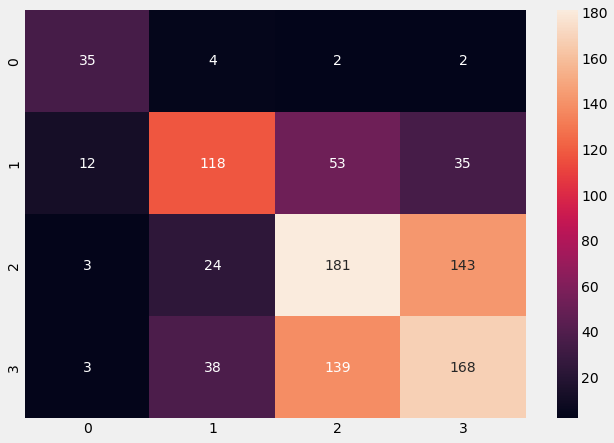

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

pred = gnb.predict(X_test)

cfm=confusion_matrix(Y_test,pred)

df_cfm = pd.DataFrame(cfm)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True,fmt='.4g')
cfm_plot.figure.savefig("cfm.png")

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [ ]:
Y_pred = knn.predict(X_test)
acc=metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",acc*100)

Accuracy: 52.39583333333333


In [ ]:
from sklearn import metrics
Y_pred = knn.predict(X_test)
acc=metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",acc*100)
print("Precision Score : ",metrics.precision_score(Y_test, Y_pred,average=None))
print("Class : \n",metrics.classification_report(Y_test,Y_pred))
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("confusion : \n",confusion_matrix)
print("TrueNegatives :",confusion_matrix[0,0])
print("FalseNegatives :",confusion_matrix[1,0])
print("TruePositives :",confusion_matrix[1,1])
print("FalsePositives :",confusion_matrix[0,1])
total=confusion_matrix[0,0]+confusion_matrix[1,0]+confusion_matrix[1,1]+confusion_matrix[0,1]
print("senstivity: ",(confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[1,0]))*100)
print("specificity: ",(confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1]))*100)
print("recall: ",metrics.recall_score(Y_test,Y_pred,average='weighted'))
print("F1-Score",metrics.f1_score(Y_test,Y_pred,average='weighted'))
print("Error rate: ", ((confusion_matrix[0,1]+confusion_matrix[1,0]))/total)

Accuracy: 52.39583333333333
Precision Score :  [0.83783784 0.64321608 0.4741784  0.47651007]
Class : 
               precision    recall  f1-score   support

           0       0.84      0.72      0.77        43
           1       0.64      0.59      0.61       218
           2       0.47      0.58      0.52       351
           3       0.48      0.41      0.44       348

    accuracy                           0.52       960
   macro avg       0.61      0.57      0.59       960
weighted avg       0.53      0.52      0.52       960

confusion : 
 [[ 31   9   1   2]
 [  4 128  52  34]
 [  0  29 202 120]
 [  2  33 171 142]]
TrueNegatives : 31
FalseNegatives : 4
TruePositives : 128
FalsePositives : 9
senstivity:  96.96969696969697
specificity:  77.5
recall:  0.5239583333333333
F1-Score 0.5235935175716665
Error rate:  0.0755813953488372


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[ 31,   9,   1,   2],
       [  4, 128,  52,  34],
       [  0,  29, 202, 120],
       [  2,  33, 171, 142]])

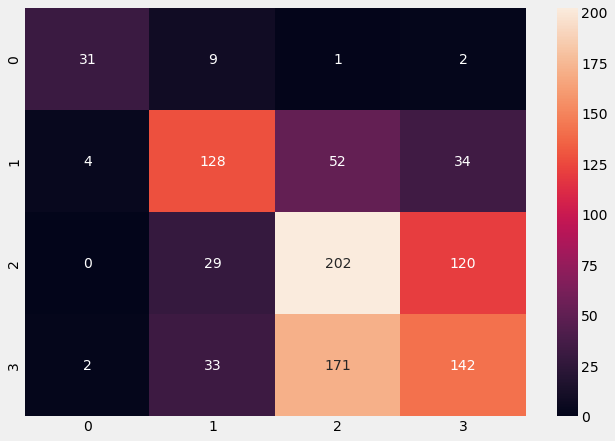

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

pred = knn.predict(X_test)

cfm=confusion_matrix(Y_test,pred)

df_cfm = pd.DataFrame(cfm)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True,fmt='.4g')
cfm_plot.figure.savefig("cfm.png")

Linear regression

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

In [ ]:
print('Coefficients: ', reg.coef_)

Coefficients:  [[-0.00488406  0.08181487  0.00628192  0.00390809  0.00557204  0.01842804
   0.0895139   0.01715576 -0.00191323]]


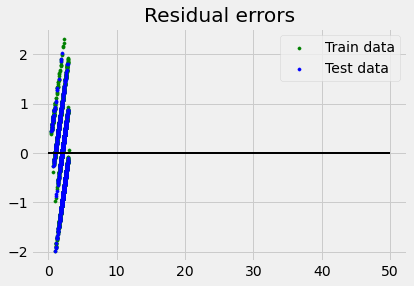

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.scatter(reg.predict(X_train), reg.predict(X_train) - Y_train,
            color = "green", s = 10, label = 'Train data')
  
plt.scatter(reg.predict(X_test), reg.predict(X_test) - Y_test,
            color = "blue", s = 10, label = 'Test data')
  

plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
  

plt.legend(loc = 'upper right')
  
plt.title("Residual errors")
  
plt.show()

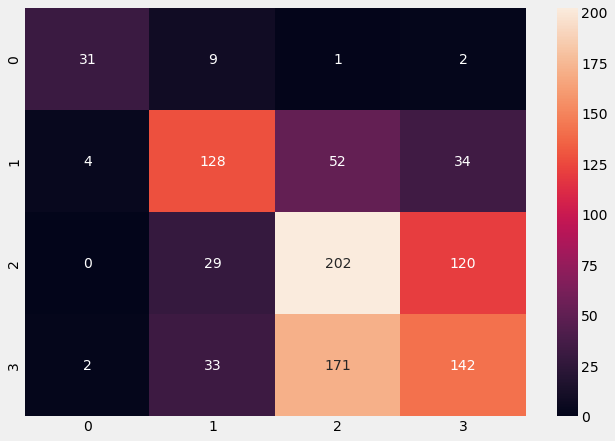

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

pred = reg.predict(X_test)

cfm=confusion_matrix(Y_test,Y_pred)

df_cfm = pd.DataFrame(cfm)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True,fmt='.4g')
cfm_plot.figure.savefig("cfm.png")

SVM

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
Y_pred = clf.predict(X_test)
acc=metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",acc*100)

Accuracy: 51.770833333333336


In [ ]:
from sklearn import metrics
Y_pred = clf.predict(X_test)
acc=metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",acc*100)
print("Precision Score : ",metrics.precision_score(Y_test, Y_pred,average=None))
print("Class : \n",metrics.classification_report(Y_test,Y_pred))
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("confusion : \n",confusion_matrix)
print("TrueNegatives :",confusion_matrix[0,0])
print("FalseNegatives :",confusion_matrix[1,0])
print("TruePositives :",confusion_matrix[1,1])
print("FalsePositives :",confusion_matrix[0,1])
total=confusion_matrix[0,0]+confusion_matrix[1,0]+confusion_matrix[1,1]+confusion_matrix[0,1]
print("senstivity: ",(confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[1,0]))*100)
print("specificity: ",(confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1]))*100)
print("recall: ",metrics.recall_score(Y_test,Y_pred,average='weighted'))
print("F1-Score",metrics.f1_score(Y_test,Y_pred,average='weighted'))
print("Error rate: ", ((confusion_matrix[0,1]+confusion_matrix[1,0]))/total)

Accuracy: 51.770833333333336
Precision Score :  [0.78571429 0.67065868 0.45496894 0.55140187]
Class : 
               precision    recall  f1-score   support

           0       0.79      0.77      0.78        43
           1       0.67      0.51      0.58       218
           2       0.45      0.83      0.59       351
           3       0.55      0.17      0.26       348

    accuracy                           0.52       960
   macro avg       0.62      0.57      0.55       960
weighted avg       0.55      0.52      0.48       960

confusion : 
 [[ 33   6   4   0]
 [  7 112  88  11]
 [  0  21 293  37]
 [  2  28 259  59]]
TrueNegatives : 33
FalseNegatives : 7
TruePositives : 112
FalsePositives : 6
senstivity:  94.11764705882352
specificity:  84.61538461538461
recall:  0.5177083333333333
F1-Score 0.47624452746977136
Error rate:  0.08227848101265822


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[ 33,   6,   4,   0],
       [  7, 112,  88,  11],
       [  0,  21, 293,  37],
       [  2,  28, 259,  59]])

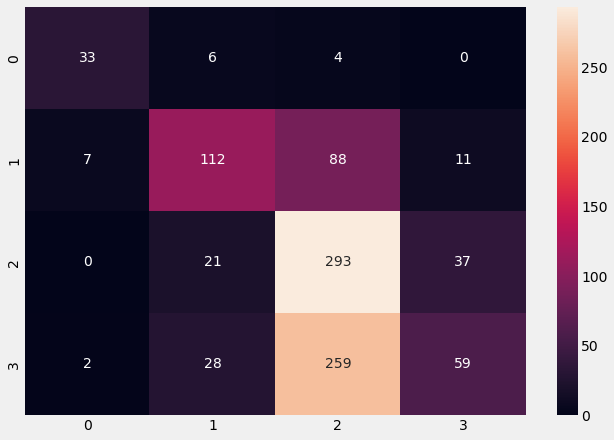

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#pred = acc.predict(X_test)

#cfm=confusion_matrix(Y_test,pred)

df_cfm = pd.DataFrame(cfm)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True,fmt='.4g')
cfm_plot.figure.savefig("cfm.png")

Decission Tree

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
Y_pred = clf.predict(X_test)
acc=metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",acc*100)

Accuracy: 52.1875


In [ ]:
from sklearn import metrics
Y_pred = clf.predict(X_test)
acc=metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",acc*100)
print("Precision Score : ",metrics.precision_score(Y_test, Y_pred,average=None))
print("Class : \n",metrics.classification_report(Y_test,Y_pred))
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("confusion : \n",confusion_matrix)
print("TrueNegatives :",confusion_matrix[0,0])
print("FalseNegatives :",confusion_matrix[1,0])
print("TruePositives :",confusion_matrix[1,1])
print("FalsePositives :",confusion_matrix[0,1])
total=confusion_matrix[0,0]+confusion_matrix[1,0]+confusion_matrix[1,1]+confusion_matrix[0,1]
print("senstivity: ",(confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[1,0]))*100)
print("specificity: ",(confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1]))*100)
print("recall: ",metrics.recall_score(Y_test,Y_pred,average='weighted'))
print("F1-Score",metrics.f1_score(Y_test,Y_pred,average='weighted'))
print("Error rate: ", ((confusion_matrix[0,1]+confusion_matrix[1,0]))/total)

Accuracy: 52.1875
Precision Score :  [0.94594595 0.536      0.5        0.48623853]
Class : 
               precision    recall  f1-score   support

           0       0.95      0.81      0.88        43
           1       0.54      0.61      0.57       218
           2       0.50      0.49      0.50       351
           3       0.49      0.46      0.47       348

    accuracy                           0.52       960
   macro avg       0.62      0.59      0.60       960
weighted avg       0.52      0.52      0.52       960

confusion : 
 [[ 35   5   2   1]
 [  1 134  47  36]
 [  1  46 173 131]
 [  0  65 124 159]]
TrueNegatives : 35
FalseNegatives : 1
TruePositives : 134
FalsePositives : 5
senstivity:  99.25925925925925
specificity:  87.5
recall:  0.521875
F1-Score 0.521510735940457
Error rate:  0.03428571428571429


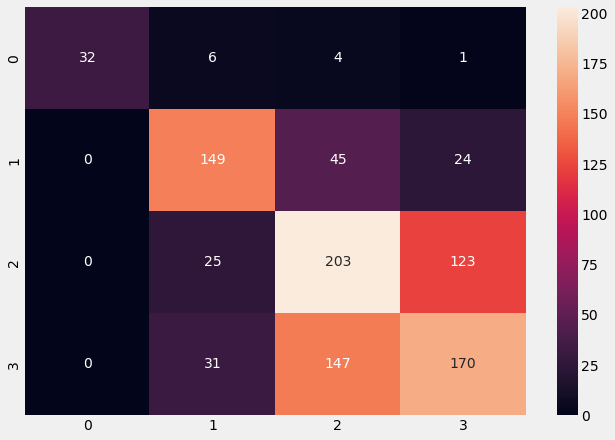

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

pred = randomForestObj.predict(X_test)

cfm=confusion_matrix(Y_test,pred)

df_cfm = pd.DataFrame(cfm)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True,fmt='.4g')
cfm_plot.figure.savefig("cfm.png")

Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, Y_train)



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [ ]:
Y_pred = clf.predict(X_test)
acc=metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",acc*100)

Accuracy: 47.604166666666664


In [ ]:
from sklearn import metrics
Y_pred = clf.predict(X_test)
acc=metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",acc*100)
print("Precision Score : ",metrics.precision_score(Y_test, Y_pred,average=None))
print("Class : \n",metrics.classification_report(Y_test,Y_pred))
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("confusion : \n",confusion_matrix)
print("TrueNegatives :",confusion_matrix[0,0])
print("FalseNegatives :",confusion_matrix[1,0])
print("TruePositives :",confusion_matrix[1,1])
print("FalsePositives :",confusion_matrix[0,1])
total=confusion_matrix[0,0]+confusion_matrix[1,0]+confusion_matrix[1,1]+confusion_matrix[0,1]
print("senstivity: ",(confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[1,0]))*100)
print("specificity: ",(confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1]))*100)
print("recall: ",metrics.recall_score(Y_test,Y_pred,average='weighted'))
print("F1-Score",metrics.f1_score(Y_test,Y_pred,average='weighted'))
print("Error rate: ", ((confusion_matrix[0,1]+confusion_matrix[1,0]))/total)

Accuracy: 47.604166666666664
Precision Score :  [0.73170732 0.54589372 0.45540797 0.4       ]
Class : 
               precision    recall  f1-score   support

           0       0.73      0.70      0.71        43
           1       0.55      0.52      0.53       218
           2       0.46      0.68      0.55       351
           3       0.40      0.21      0.28       348

    accuracy                           0.48       960
   macro avg       0.53      0.53      0.52       960
weighted avg       0.47      0.48      0.45       960

confusion : 
 [[ 30  11   1   1]
 [  7 113  67  31]
 [  1  31 240  79]
 [  3  52 219  74]]
TrueNegatives : 30
FalseNegatives : 7
TruePositives : 113
FalsePositives : 11
senstivity:  94.16666666666667
specificity:  73.17073170731707
recall:  0.47604166666666664
F1-Score 0.45329171477618896
Error rate:  0.11180124223602485


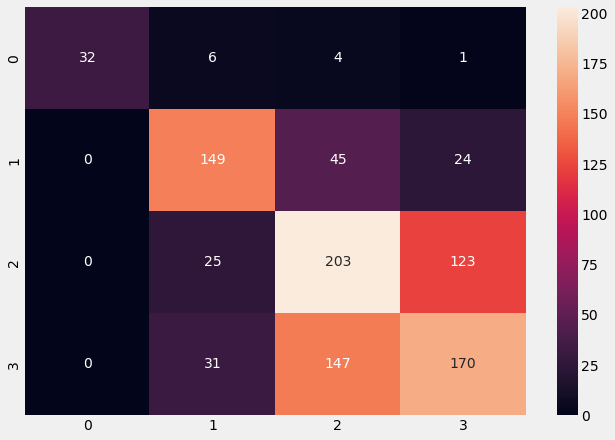

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

pred = randomForestObj.predict(X_test)

cfm=confusion_matrix(Y_test,pred)

df_cfm = pd.DataFrame(cfm)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True,fmt='.4g')
cfm_plot.figure.savefig("cfm.png")

K-Means

In [ ]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=2, random_state=0)
clf.fit(X_train, Y_train)

KMeans(n_clusters=2, random_state=0)

In [ ]:
Y_pred = clf.predict(X_test)
acc=metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",acc*100)

Accuracy: 13.333333333333334


# On bases of two parameters - risk & tos

In [ ]:
t_cols=["age","gen","systolic","distolic","glucose","paralysis","smoking","bmi","cholestrol"]
X=df[t_cols]
t=["tos"]
y=df[t]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomForestObj = RandomForestClassifier(n_estimators=100)
randomForestObj.fit(X_train, Y_train)

<ipython-input-100-95d76c4b78b5>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForestObj.fit(X_train, Y_train)


RandomForestClassifier()

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
clf.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 9.83752532
Iteration 2, loss = 1.09771662
Iteration 3, loss = 1.01387190
Iteration 4, loss = 1.01140526
Iteration 5, loss = 0.99810045
Iteration 6, loss = 1.00041180
Iteration 7, loss = 0.99713644
Iteration 8, loss = 1.00313593
Iteration 9, loss = 0.98985947
Iteration 10, loss = 0.98829215
Iteration 11, loss = 0.99112650
Iteration 12, loss = 0.98310463
Iteration 13, loss = 0.98760253
Iteration 14, loss = 0.98447086
Iteration 15, loss = 0.98063953
Iteration 16, loss = 0.98013624
Iteration 17, loss = 0.97748008
Iteration 18, loss = 0.97399755
Iteration 19, loss = 0.97199523
Iteration 20, loss = 0.97854757
Iteration 21, loss = 0.97081868
Iteration 22, loss = 0.96988728
Iteration 23, loss = 0.97404406
Iteration 24, loss = 0.97525660
Iteration 25, loss = 0.96588283
Iteration 26, loss = 0.97046088
Iteration 27, loss = 0.96373593
Iteration 28, loss = 0.96499555
Iteration 29, loss = 0.96836512
Iteration 30, loss = 0.96522477
Iteration 31, loss = 0.96663746
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=500, random_state=21,
              solver='sgd', tol=1e-09, verbose=10)

In [ ]:
Y_pred = clf.predict(X_test)
acc=metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",acc*100)

Accuracy: 50.416666666666664


# **xgboost**

In [ ]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install --upgrade xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 193.6 MB 80 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(X_train, Y_train, verbose=False)

[14:28:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
predictions = my_model.predict(X_test)
acc=metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:",acc*100)

Accuracy: 50.416666666666664


In [ ]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import pandas as pd

In [ ]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X,y)

In [ ]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_4 <= 214.50
|   |--- feature_7 <= 24.50
|   |   |--- feature_4 <= 113.00
|   |   |   |--- class: 0
|   |   |--- feature_4 >  113.00
|   |   |   |--- feature_8 <= 187.50
|   |   |   |   |--- feature_4 <= 171.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_4 >  171.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_8 >  187.50
|   |   |   |   |--- feature_7 <= 22.50
|   |   |   |   |   |--- feature_0 <= 63.50
|   |   |   |   |   |   |--- feature_2 <= 157.00
|   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |--- feature_2 >  157.00
|   |   |   |   |   |   |   |--- feature_5 <= 1.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_5 >  1.50
|   |   |   |   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 175.50
|   |   |   |   |   |   |   |   |   | 

In [ ]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

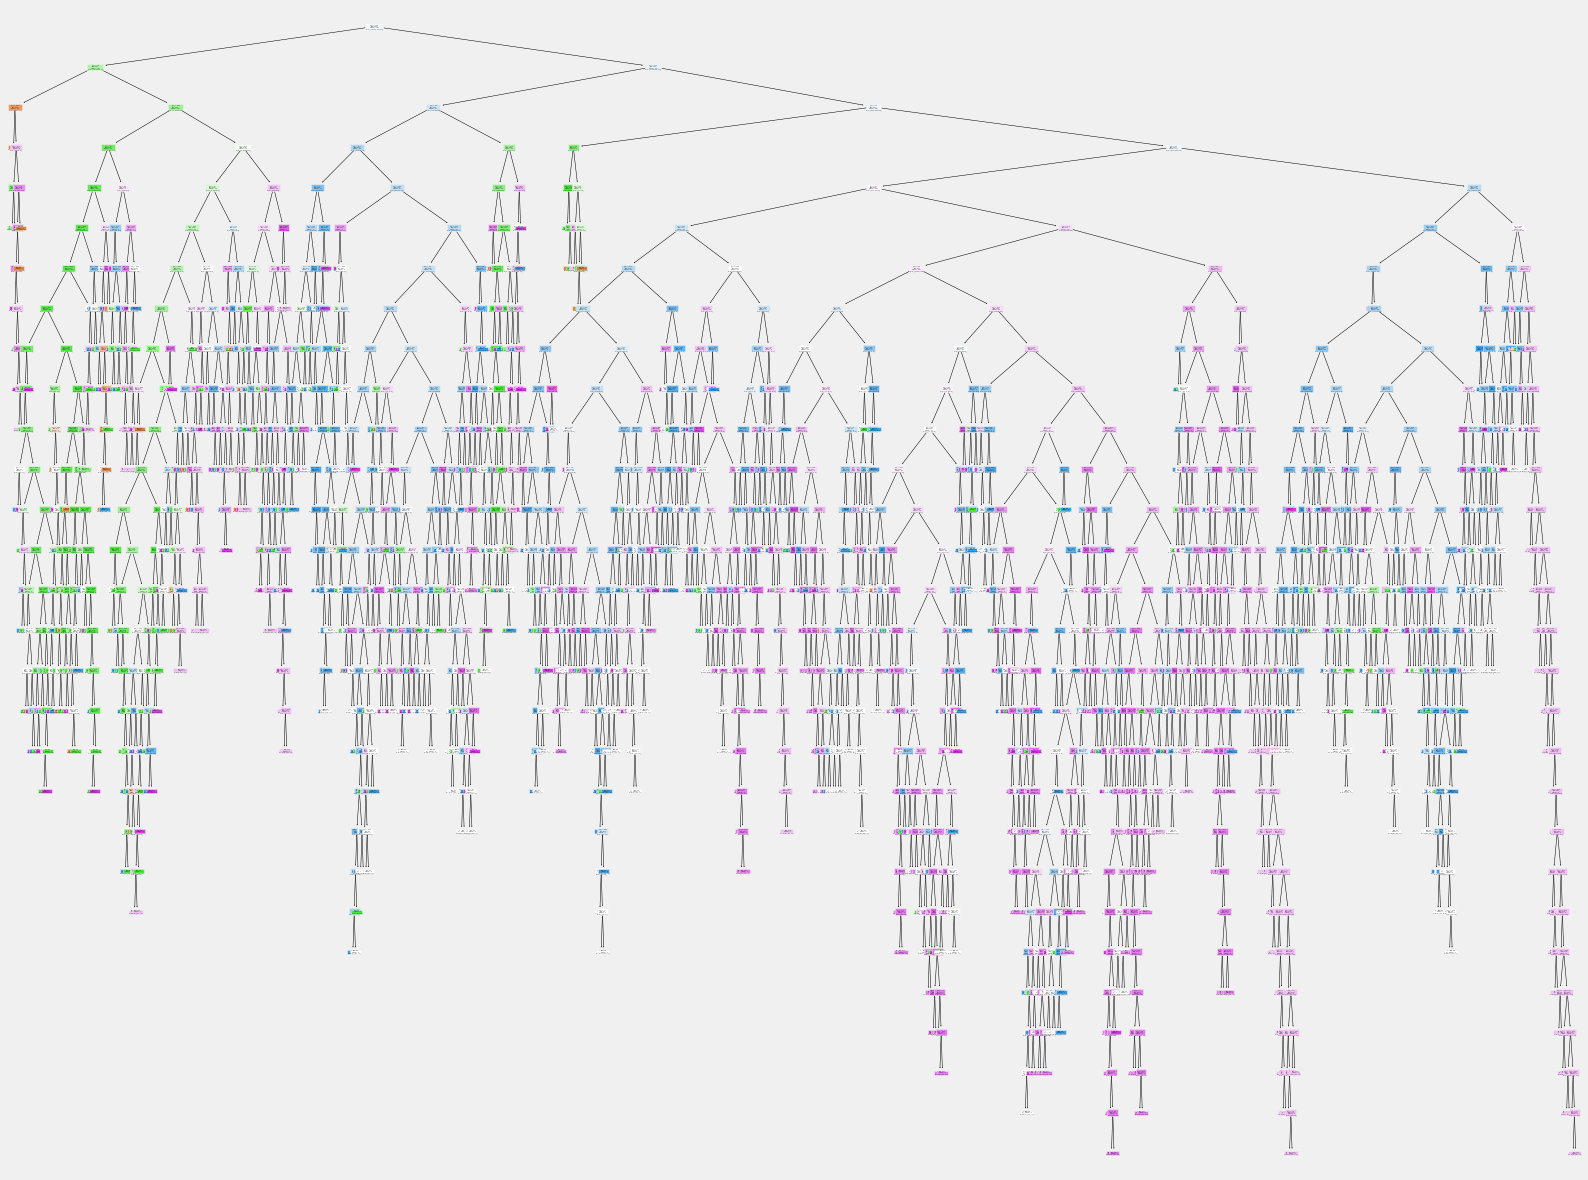

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, filled=True)

In [ ]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, filled=True)

# Draw graph
fie_ext = 'png'
temp_img = 'temp_file'
graph = graphviz.Source(dot_data, format="png") 
graph.render(temp_img,format=fie_ext, view=False)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.421018 to fit


'temp_file.png'